# Libraries

In [5]:
import os
import sys
import pickle
import datetime, time
import random
import importlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import pytz
#import holidays

module_paths = {os.pardir}  # intersections_normandie directory
sys.path.extend(module_paths.difference(sys.path))

from nytf import utils; importlib.reload(utils)
pass

# Loading dataframes

In [6]:
%%time
train = utils.load_dataframe('train')
test = utils.load_dataframe('test')

Wall time: 7.91 s


In [3]:
train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.90,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.70,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.70,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.30,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
5,12.10,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1
6,7.50,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1
7,16.50,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
8,9.00,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1
9,8.90,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2


In [4]:
test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12+00:00,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20+00:00,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20+00:00,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20+00:00,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20+00:00,-73.969582,40.765519,-73.980686,40.770725,1


# Exploration of fare_amount

There are 0 NaN in train


count    5.542386e+07
mean     1.134505e+01
std      2.071083e+01
min     -3.000000e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      9.396336e+04
Name: fare_amount, dtype: float64

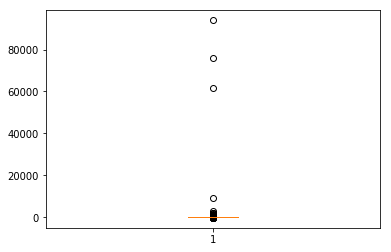

In [5]:
# Very big std...
# Maybe there are some outlayers
plt.boxplot(train.fare_amount)
print('There are {} NaN in train'.format(train.fare_amount.isna().sum()))
train.fare_amount.describe()

The number of fare_amount not in [0,100] is 23329.


count    5.542386e+07
mean     1.132570e+01
std      9.564939e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.000000e+02
Name: fare_amount, dtype: float64

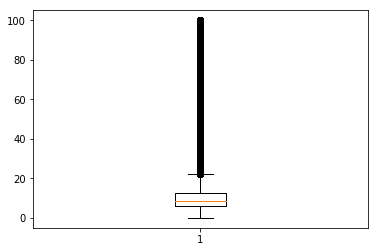

In [6]:
# We can for example clip values in [clip_min,clip_max] and obtain a more reasonable std of 9.6$
clip_min = 0
clip_max = 100

fare_cliped = train.fare_amount.clip(clip_min, clip_max)
plt.boxplot(fare_cliped)
print('The number of fare_amount not in [{},{}] is {}.'.format(clip_min, clip_max, (train.fare_amount < clip_min).sum() + (train.fare_amount > clip_max).sum()))
fare_cliped.describe()

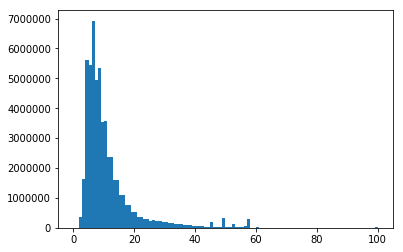

In [7]:
# This is better.
# Most part of fares are in [0, 65].
# It is probably safer to drop outlayers than clip it.
plt.hist(fare_cliped, bins=100)
pass

# Exploration of passenger_count

In [8]:
# Some outlayers: 7, 8, 9, 34, 49, 51, 128, 208 and maybe 0.
# No NaN, but 0 may be considered has it.
# Pertinent featurs seems to be dataframe.passenger_count>=i for i in range(1, 7) or range(2, 7) if 0 is drop.
# It is safer to drop outlayers.
# There is a similare frequencies in train and test

counts = pd.DataFrame({
    'train': train.passenger_count.value_counts(dropna=False),
    'test': test.passenger_count.value_counts(dropna=False),
    'train_freq': train.passenger_count.value_counts(dropna=False, normalize=True),
    'test_freq': test.passenger_count.value_counts(dropna=False, normalize=True)}
).fillna(0)
counts.test = counts.test.astype('int')
counts

,train,test,train_norm,test_norm
0,195416,0,3.525846e-03,0.000000
1,38337524,6914,6.917152e-01,0.697398
2,8175243,1474,1.475040e-01,0.148679
3,2432712,447,4.389287e-02,0.045088
4,1178852,206,2.126976e-02,0.020779
5,3929346,696,7.089629e-02,0.070204
6,1174647,177,2.119389e-02,0.017854
7,15,0,2.706416e-07,0.000000
8,9,0,1.623849e-07,0.000000
9,23,0,4.149838e-07,0.000000


# Exploration of pickup_datetime

2012    8919666
2011    8841346
2013    8655190
2009    8543166
2010    8354997
2014    8252682
2015    3856809
Name: pickup_datetime, dtype: int64

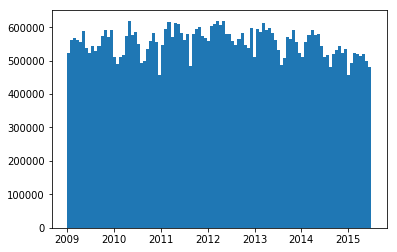

In [9]:
# There is no outlayer for train, years are in [2009, 2015]
plt.hist(train.pickup_datetime, bins=100)
train.pickup_datetime.apply(getattr, args=('year',)).value_counts(dropna=False)

2011    2050
2014    1902
2010    1753
2012    1433
2013    1135
2009    1022
2015     619
Name: pickup_datetime, dtype: int64

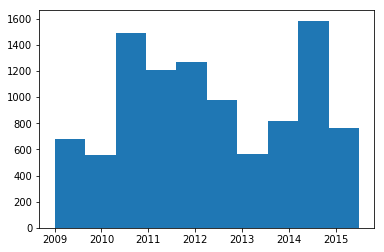

In [10]:
# There is no outlayer for test, years are in [2009, 2015], it is in the same periode than train.
plt.hist(test.pickup_datetime, bins=10)
test.pickup_datetime.apply(getattr, args=('year',)).value_counts(dropna=False)

In [11]:
# To conclude it seems that test and train was obtain by an uniforme spliting on a same dataframe
# with a cleaning of outlayers for test

# In progress: creation of time basic features

In [12]:
# mod_day, mod_week, mod_month, mod_year, timestamp, public_holiday seems to be basic pertinent features

In [23]:
%%time
timestamp = train.pickup_datetime.apply(lambda t: ((((t.year - 2009) * 365 + t.dayofyear - 1) * 24 + t.hour) * 60 + t.minute) * 60 + t.second) + datetime.datetime(2009, 1, 1, tzinfo=datetime.timezone.utc).timestamp()
timestamp[train.pickup_datetime.apply(lambda t: t.year) > 2012] += 24 * 60 * 60

Wall time: 46 s


In [14]:
pickup_local_datetime = train.pickup_datetime.apply(lambda t: t.tz_convert(pytz.timezone('US/Eastern')))

count    5.542386e+07
mean     5.133912e-01
std      2.429542e-01
min      0.000000e+00
25%      3.118056e-01
50%      5.296644e-01
75%      7.107523e-01
max      9.999884e-01
Name: pickup_datetime, dtype: float64
Wall time: 1min 43s


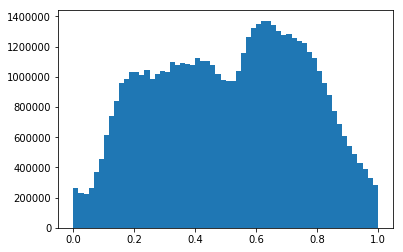

In [22]:
%%time
day_rate = pickup_local_datetime.apply(lambda t: (t.hour + (t.minute + t.second / 60) / 60) / 24)
plt.hist(day_rate, bins=60)
print(day_rate.describe())

count    5.542386e+07
mean     4.997331e-01
std      2.773733e-01
min      0.000000e+00
25%      2.506944e-01
50%      5.091270e-01
75%      7.440476e-01
max      9.999008e-01
Name: pickup_datetime, dtype: float64
Wall time: 28.8 s


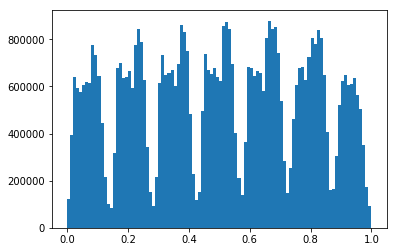

In [16]:
%%time
week_rate = (pickup_local_datetime.apply(lambda t: t.dayofweek) + day_rate) / 7
plt.hist(week_rate, bins=100)
print(week_rate.describe())

count    5.542386e+07
mean     5.009713e-01
std      2.852889e-01
min      0.000000e+00
25%      2.556481e-01
50%      4.994848e-01
75%      7.452778e-01
max      9.999776e-01
Name: pickup_datetime, dtype: float64
Wall time: 54.6 s


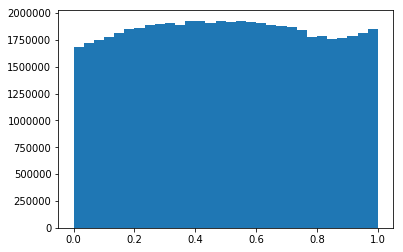

In [17]:
%%time
month_rate = (pickup_local_datetime.apply(lambda t: t.day) - 1 + day_rate) / pickup_local_datetime.apply(lambda t: t.days_in_month)
plt.hist(month_rate, bins=30)
print(month_rate.describe())

count    5.542386e+07
mean     4.788518e-01
std      2.869524e-01
min      0.000000e+00
25%      2.319559e-01
50%      4.563128e-01
75%      7.305004e-01
max      9.999981e-01
Name: pickup_datetime, dtype: float64
Wall time: 55.3 s


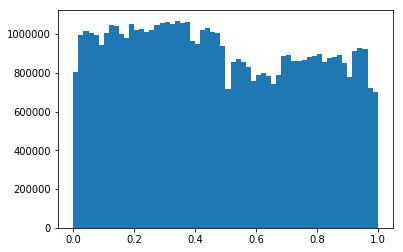

In [18]:
%%time
year_rate = (pickup_local_datetime.apply(lambda t: t.dayofyear) - 1 + day_rate) / (365 + pickup_local_datetime.apply(lambda t: t.year).isin({2008, 2012}))
plt.hist(year_rate, bins=60)
print(year_rate.describe())

# In progress; holiday

In [19]:
newyork_holidays = holidays.CountryHoliday('US', state='NY')

In [192]:
datetime.date(2015, 1, 1) in newyork_holidays

True

In [101]:
from collections import defaultdict
from operator import getitem

In [138]:
year = test.pickup_datetime.apply(lambda t: t.year)

In [191]:
HOLIDAY_TO_CODE = ['Christmas Day', 'Christmas Day (Observed)', 'Columbus Day', 'Election Day', 'Independence Day', 'Independence Day (Observed)', 'Labor Day', "Lincoln's Birthday", "Lincoln's Birthday (Observed)", 'Martin Luther King, Jr. Day', 'Memorial Day', "New Year's Day", "New Year's Day (Observed)", 'Susan B. Anthony Day', 'Thanksgiving', 'Veterans Day', 'Veterans Day (Observed)', "Washington's Birthday", "Washington's Birthday, Susan B. Anthony Day"]
CODE_TO_HOLLIDAY = {i + 1: name for i, name in enumerate(HOLIDAY_TO_CODE)}
HOLIDAY_TO_CODE = {name: i + 1 for i, name in enumerate(HOLIDAY_TO_CODE)}

for y in range(2009, 2016):
    for m in range(1, 13):
        for d in range(1, 32):
            try:
                name = newyork_holidays.get(datetime.date(y, m, d))
            except ValueError:
                break
            if name is not None:
                print(1)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [181]:
print(repr(sorted(code_to_name.values())))

['Christmas Day', 'Christmas Day (Observed)', 'Columbus Day', 'Election Day', 'Independence Day', 'Independence Day (Observed)', 'Labor Day', "Lincoln's Birthday", "Lincoln's Birthday (Observed)", 'Martin Luther King, Jr. Day', 'Memorial Day', "New Year's Day", "New Year's Day (Observed)", 'Susan B. Anthony Day', 'Thanksgiving', 'Veterans Day', 'Veterans Day (Observed)', "Washington's Birthday", "Washington's Birthday, Susan B. Anthony Day"]


In [188]:
HOLIDAY_TO_CODE = ['Christmas Day', 'Christmas Day (Observed)', 'Columbus Day', 'Election Day', 'Independence Day', 'Independence Day (Observed)', 'Labor Day', "Lincoln's Birthday", "Lincoln's Birthday (Observed)", 'Martin Luther King, Jr. Day', 'Memorial Day', "New Year's Day", "New Year's Day (Observed)", 'Susan B. Anthony Day', 'Thanksgiving', 'Veterans Day', 'Veterans Day (Observed)', "Washington's Birthday", "Washington's Birthday, Susan B. Anthony Day"]
CODE_TO_HOLLIDAY = {i + 1: name for i, name in enumerate(HOLIDAY_TO_CODE)}
HOLIDAY_TO_CODE = {name: i + 1 for i, name in enumerate(HOLIDAY_TO_CODE)}

In [190]:
CODE_TO_HOLLIDAY

{1: 'Christmas Day',
 2: 'Christmas Day (Observed)',
 3: 'Columbus Day',
 4: 'Election Day',
 5: 'Independence Day',
 6: 'Independence Day (Observed)',
 7: 'Labor Day',
 8: "Lincoln's Birthday",
 9: "Lincoln's Birthday (Observed)",
 10: 'Martin Luther King, Jr. Day',
 11: 'Memorial Day',
 12: "New Year's Day",
 13: "New Year's Day (Observed)",
 14: 'Susan B. Anthony Day',
 15: 'Thanksgiving',
 16: 'Veterans Day',
 17: 'Veterans Day (Observed)',
 18: "Washington's Birthday",
 19: "Washington's Birthday, Susan B. Anthony Day"}

In [149]:
import operator

In [153]:
i = 0
operator.iadd(i, 1)

1

In [156]:
ValueError

int